# 07 Linear Regression

In [1]:
import torch 
import torch.nn as nn 
import numpy as np
from sklearn import datasets

### Data

In [2]:
Xn, Yn = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [4]:
x = torch.from_numpy(Xn.astype(np.float32))
y = torch.from_numpy(Yn.astype(np.float32)).view(Yn.shape[0], 1)

In [5]:
n_samp, n_feat = x.shape 
model = nn.Linear(n_feat, 1)

### Loss and optimizer

In [6]:
criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Training

In [7]:
nepochs = 100
for epoch in range(nepochs):
    y_pred = model(x)
    loss = criteria(y_pred, y)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 9:
        print(f"epoch: {epoch+1}, loss: {loss.item():.5f}")

epoch: 10, loss: 4325.82080
epoch: 20, loss: 3226.72363
epoch: 30, loss: 2432.11963
epoch: 40, loss: 1857.00537
epoch: 50, loss: 1440.31604
epoch: 60, loss: 1138.12048
epoch: 70, loss: 918.76221
epoch: 80, loss: 759.40295
epoch: 90, loss: 643.54395
epoch: 100, loss: 559.25171


In [9]:
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


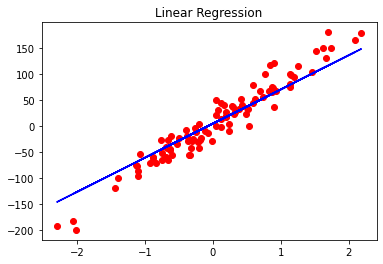

In [14]:
pred = model(x).detach()
plt.plot(Xn, Yn, 'ro')
plt.plot(Xn, pred, 'b')
plt.title("Linear Regression")
plt.show()